In [1]:
!pip install datasets

In [2]:
!pip install lmfit

In [41]:
import random
import tqdm
# import torch
import numpy as np
import matplotlib.pyplot as plt
import json
from datasets import load_dataset
import os
import math

In [4]:

root = os.path.dirname(os.getcwd())
info_dict_harmfulness1 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/26-09_11-32-27',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
            'tasks': 'harmfulness',
            'do_sample': True}
info_dict_harmfulness2 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/27-09_01-16-19',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
            'tasks': 'harmfulness',
            'do_sample': False}

info_dict_harmfulness3 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/26-09_11-33-00',
            'model_name': 'meta-llama/Llama-2-13b-chat-hf',
            'tasks': 'harmfulness',
            'do_sample': True}
info_dict_harmfulness4 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/27-09_02-27-30',
            'model_name': 'meta-llama/Llama-2-13b-chat-hf',
            'tasks': 'harmfulness',
            'do_sample': False}

info_dict_harmfulness5 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/26-09_22-09-21',
            'model_name': 'meta-llama/Llama-2-13b-hf',
            'tasks': 'harmfulness',
            'do_sample': True}
info_dict_harmfulness6 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/26-09_11-33-16',
            'model_name': 'meta-llama/Llama-2-13b-hf',
            'tasks': 'harmfulness',
            'do_sample': False}

info_dict_harmfulness7 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/26-09_11-36-41',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B',
            'tasks': 'harmfulness',
            'do_sample': True}
info_dict_harmfulness8 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/26-09_11-32-48',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B',
            'tasks': 'harmfulness',
            'do_sample': False}



info_dict_fairness1 = {'output_dir': f'{root}/data/fairness_experiments_outputs/26-09_21-07-26',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
            'tasks': 'fairness',
            'do_sample': True}
info_dict_fairness2 = {'output_dir': f'{root}/data/fairness_experiments_outputs/27-09_01-17-32',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
            'tasks': 'fairness',
            'do_sample': False}

info_dict_fairness3 = {'output_dir': f'{root}/data/fairness_experiments_outputs/26-09_11-36',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B',
            'tasks': 'fairness',
            'do_sample': True}
info_dict_fairness4 = {'output_dir': f'{root}/data/fairness_experiments_outputs/26-09_21-07-50',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B',
            'tasks': 'fairness',
            'do_sample': False}

info_dict_fairness5 = {'output_dir': f'{root}/data/fairness_experiments_outputs/26-09_21-08-12',
            'model_name': 'meta-llama/Llama-2-13b-chat-hf',
            'tasks': 'fairness',
            'do_sample': True}
info_dict_fairness6 = {'output_dir': f'{root}/data/fairness_experiments_outputs/27-09_02-11-01',
            'model_name': 'meta-llama/Llama-2-13b-chat-hf',
            'tasks': 'fairness',
            'do_sample': False}

info_dict_fairness7 = {'output_dir': f'{root}/data/fairness_experiments_outputs/27-09_01-23-57',
            'model_name': 'meta-llama/Llama-2-13b-hf',
            'tasks': 'fairness',
            'do_sample': True}
info_dict_fairness8 = {'output_dir': f'{root}/data/fairness_experiments_outputs/26-09_11-35',
            'model_name': 'meta-llama/Llama-2-13b-hf',
            'tasks': 'fairness',
            'do_sample': False}



In [42]:
def get_elements_until_key(my_dict, stop_key):
    result = {}
    for key, value in my_dict.items():
        result[key] = value
        if key == stop_key:
            break
    return result

def get_elements_from_a_key(my_dict, start_key):
    result = {}
    flag = False
    for key, value in my_dict.items():
        if key == start_key:
            flag = True
        if flag:
            result[key] = value
    return result

In [43]:
# Define the quadratic functions
def corollary_1_quadratic_function(x, a, b):
    return (0.5 / (1+ a + a * (((b**2)/2) * (x**2)))) + 0.25

def corollary_1_quadratic_function_no_bias(x, a, b):
    return (1 / (1+ a + a * (((b**2)/2) * (x**2))))

In [44]:
import numpy as np
from scipy.optimize import curve_fit
from lmfit import Model

model = Model(corollary_1_quadratic_function)
model_no_bias = Model(corollary_1_quadratic_function_no_bias)

# Define your (x, y) coordinates
x_data = list(np.round(np.arange(-5, 5.2, 0.25), 2))
x_full = list(np.round(np.arange(-10, 10.2, 0.25), 2))
x_data_idx = [i for i, v in enumerate(x_full) if v in x_data]


ylabel = 'probability of correct answer'
ylabel_relative = 'probability of correct answer out of A, B, C, D'


In [8]:
            # if os.path.exists(f'{output_dir}/{dataset_name}/helpfulness_harmfulness_{model_name.replace("/","_")}_stats_sample2.json'):
            #   switch_key=-5.0
            #   with open(f'{output_dir}/{dataset_name}/helpfulness_harmfulness_{model_name.replace("/","_")}_stats_sample2.json', 'r') as file:
            #     stats_dict2 = json.load(file)
            #     stats_dict2 = eval(stats_dict2.strip())
                
            #   stats_dict['p_mean'] = dict(chain(get_elements_until_key(stats_dict['p_mean'], switch_key).items(), 
            #                                     get_elements_from_a_key(stats_dict2['p_mean'], switch_key).items()))
            #   stats_dict['p_mean_relative'] = dict(chain(get_elements_until_key(stats_dict['p_mean_relative'], switch_key).items(), 
            #                                     get_elements_from_a_key(stats_dict2['p_mean_relative'], switch_key).items()))
            #   stats_dict['p_std'] = dict(chain(get_elements_until_key(stats_dict['p_std'], switch_key).items(), 
            #                                     get_elements_from_a_key(stats_dict2['p_std'], switch_key).items()))
            #   stats_dict['p_std_relative'] = dict(chain(get_elements_until_key(stats_dict['p_std_relative'], switch_key).items(), 
            #                                     get_elements_from_a_key(stats_dict2['p_std_relative'], switch_key).items()))
            #   stats_dict['acc_mean'] = dict(chain(get_elements_until_key(stats_dict['acc_mean'], switch_key).items(),
            #                                     get_elements_from_a_key(stats_dict2['acc_mean'], switch_key).items()))
            #   stats_dict['acc_std'] = dict(chain(get_elements_until_key(stats_dict['acc_std'], switch_key).items(),
            #                                     get_elements_from_a_key(stats_dict2['acc_std'], switch_key).items()))

In [106]:
info_dict = info_dict_fairness8

x = list(np.round(np.arange(-10, 10.2, 0.25), 2))
dataset_names = ['medical_genetics', 'high_school_computer_science', 'international_law']
model_names = [info_dict['model_name']]
tasks = [info_dict['tasks']]
output_dir = info_dict['output_dir']

p_mean = {task_key: {model_name_key: {mmlu_key: {key: 0 for key in x} for mmlu_key in dataset_names} for model_name_key in model_names} for task_key in tasks}
p_mean_relative = {task_key: {model_name_key: {mmlu_key: {key: 0 for key in x} for mmlu_key in dataset_names} for model_name_key in model_names} for task_key in tasks}
acc_mean = {task_key: {model_name_key: {mmlu_key: {key: 0 for key in x} for mmlu_key in dataset_names} for model_name_key in model_names} for task_key in tasks}
p_std = {task_key: {model_name_key: {mmlu_key: {key: 0 for key in x} for mmlu_key in dataset_names} for model_name_key in model_names} for task_key in tasks}
p_std_relative = {task_key: {model_name_key: {mmlu_key: {key: 0 for key in x} for mmlu_key in dataset_names} for model_name_key in model_names} for task_key in tasks}
acc_std = {task_key: {model_name_key: {mmlu_key: {key: 0 for key in x} for mmlu_key in dataset_names} for model_name_key in model_names} for task_key in tasks}

In [107]:
from itertools import chain

start_key = -10.0
stop_key = 10.1

for task in tasks:
    for model_name in model_names:
        for dataset_name in dataset_names:
        # for i, coeff in enumerate(x):
            with open(f'{output_dir}/{dataset_name}/helpfulness_{task}_{model_name.replace("/","_")}_stats_sample.json', 'r') as file:
                stats_dict = json.load(file)
                stats_dict = eval(stats_dict.strip())                
            p_mean[task][model_name][dataset_name] = stats_dict['p_mean']
            p_mean_relative[task][model_name][dataset_name] = stats_dict['p_mean_relative']
            p_std[task][model_name][dataset_name] = stats_dict['p_std']
            p_std_relative[task][model_name][dataset_name] = stats_dict['p_std_relative']
            acc_mean[task][model_name][dataset_name] = stats_dict['acc_mean']
            acc_std[task][model_name][dataset_name] = stats_dict['acc_std']
        

In [108]:
def plot_figure_mmlu_multi(x, y, y_err, y_data_fit, ylabel, y_tagging, mmlu_dataset_names, task, model_name, f_fit, fit_label=''):
    def moving_average(data, window_size):
      return np.convolve(data, np.ones(window_size)/window_size, mode='same')

    # Set initial parameter values and bounds (if needed)
    params = f_fit.make_params(a=1, b=1)
    # Optionally, you can set parameter bounds
    params['a'].min = 0
    params['b'].min = 0
    # Perform the fit
    result = f_fit.fit(y_data_fit, x=x_data, params=params)
    if 'A, B, C, D' in ylabel:
      # the current plot is over the resricted vocabulary (|V|={A,B,C,D}) -> bias=0.5
      y_fit = [corollary_1_quadratic_function(x_elem, result.params['a'].value, result.params['b'].value/2.5) for x_elem in x]
    else:
      # the current plot is over the entire vocabulary meaning bias->2
      y_fit = [corollary_1_quadratic_function_no_bias(x_elem, result.params['a'].value, result.params['b'].value/2.5) for x_elem in x]

    # Create a plot
    short_model_name = model_name.split('/')[1]
    folder_name = f'/home/dshteyma/REPE_alignment_helpfulness_tradeoff/data/plots/helpfulness_plots/{short_model_name}_{task}/'
    os.makedirs(folder_name, exist_ok=True)
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Plot x vs y
    window_size=5
    fitted_label=''
    for mmlu_dataset in mmlu_dataset_names:
        y_plot = np.array(list(y[mmlu_dataset].values()))
        if y_tagging != 'p' or 'A, B, C, D' not in ylabel:
            y_plot = moving_average(y_plot, window_size)
        y_err_plot = np.array(list(y_err[mmlu_dataset].values())) / 10 # The standard error is std/sqrt(n). in our case n=100 for all mmlu sub-datasets
        mmlu_dataset_label = mmlu_dataset.replace("computer_science", 'CS').replace('_', ' ')
        plt.plot(np.array(x), y_plot, label = f'{mmlu_dataset_label}')  # Adjust marker and linestyle as needed
        plt.fill_between(np.array(x), y_plot - y_err_plot, y_plot + y_err_plot, alpha=0.2)
    # if 'Llama-2' in model_name and 'A, B, C, D' not in ylabel and y_tagging == 'p':
    if fit_label == '_fitted':
      plt.plot(x, y_fit, label = f'fitted')

    # Add labels and title
    plt.xlabel(r"$r_e$")
    if y_tagging == 'acc':
      plt.ylabel('Accuracy')
    else:
      plt.ylabel('P(correct)')

    
    tail_title = ''
    if 'A, B, C, D' in ylabel:
      tail_title = '- restricted to A, B, C, D'
    if task == 'harmfulness':
      plt.title(f'Harmfulness behavior - {short_model_name} {tail_title}')
    else:
      plt.title(f'Fairness behavior - {short_model_name} {tail_title}')
    plt.legend()

    # Display the plot
    # plt.grid(True)  # Add gridlines if desired
    do_sample = info_dict['do_sample']
    if y_tagging == 'acc':
      plt.savefig(os.path.join(folder_name, f'acc_{short_model_name}_{task}_helpfulness_{do_sample}{fit_label}.png'))
    elif 'A, B, C, D' in ylabel and y_tagging == 'p':
      plt.savefig(os.path.join(folder_name, f'p_relative_{short_model_name}_{task}_helpfulness_{do_sample}{fit_label}.png'))
    else:
      plt.savefig(os.path.join(folder_name, f'p_{short_model_name}_{task}_helpfulness_{do_sample}{fit_label}.png'))

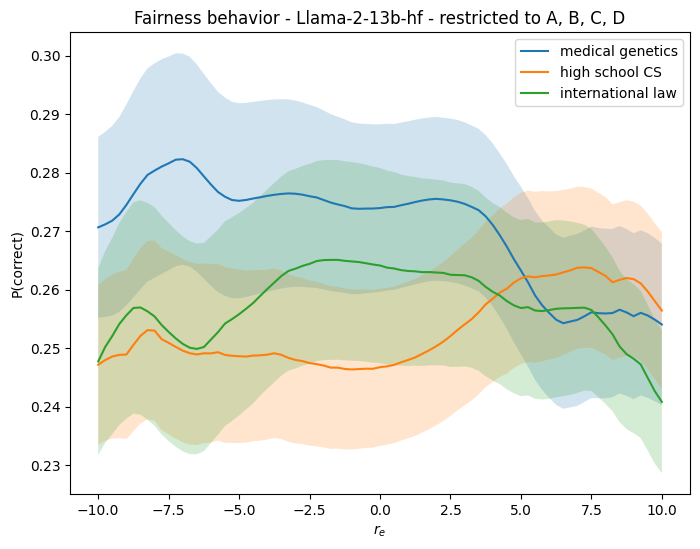

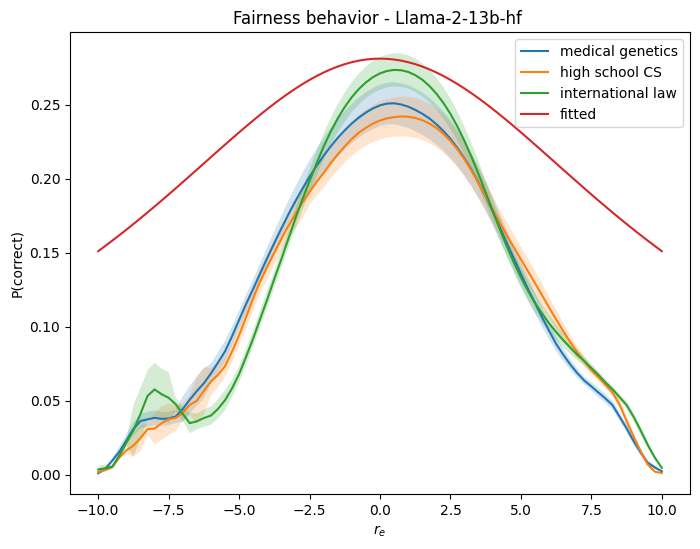

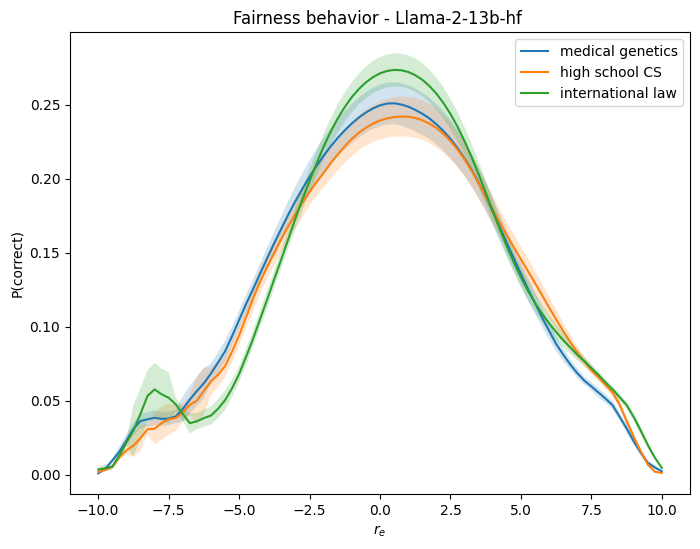

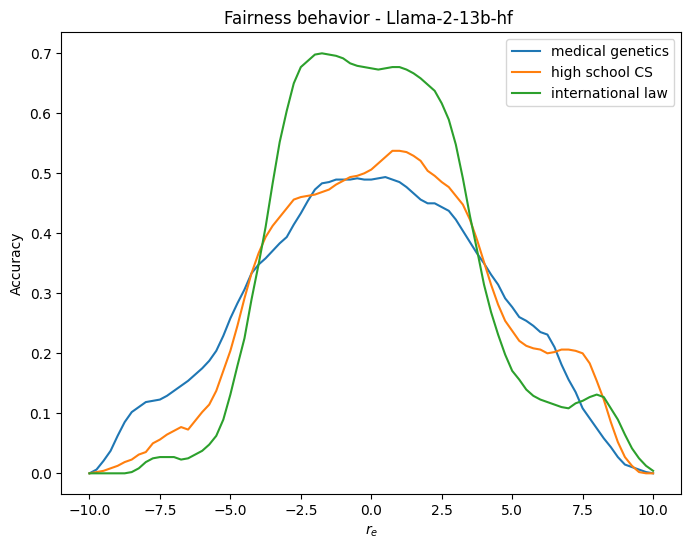

In [109]:
for task in tasks:
  for model_name in model_names:
    dataset_to_fit = 'medical_genetics' if "Llama-3" in model_name else 'international_law'
    y_data_fit_relative = [round(v,2) for i, v in enumerate(list(p_mean_relative[task][model_name][dataset_to_fit].values())) if i in x_data_idx]
    y_data_fit = [round(v,2) for i, v in enumerate(list(p_mean[task][model_name][dataset_to_fit].values())) if i in x_data_idx]
    # x, y, y_data_fit, ylabel, mmlu_dataset_names, task, model
    plot_figure_mmlu_multi(x=x_full, y=p_mean_relative[task][model_name], y_err=p_std_relative[task][model_name], y_data_fit=np.array(y_data_fit_relative), ylabel=ylabel_relative, y_tagging='p', mmlu_dataset_names=dataset_names, task=task, model_name=model_name, f_fit=model, fit_label='')
    plot_figure_mmlu_multi(x=x_full, y=p_mean[task][model_name], y_err=p_std[task][model_name], y_data_fit=np.array(y_data_fit), ylabel=ylabel, y_tagging='p', mmlu_dataset_names=dataset_names, task=task, model_name=model_name, f_fit=model_no_bias, fit_label='_fitted')
    plot_figure_mmlu_multi(x=x_full, y=p_mean[task][model_name], y_err=p_std[task][model_name], y_data_fit=np.array(y_data_fit), ylabel=ylabel, y_tagging='p', mmlu_dataset_names=dataset_names, task=task, model_name=model_name, f_fit=model_no_bias, fit_label='')
    plot_figure_mmlu_multi(x=x_full, y=acc_mean[task][model_name], y_err=acc_std[task][model_name], y_data_fit=np.array(y_data_fit), ylabel=ylabel, y_tagging='acc', mmlu_dataset_names=dataset_names, task=task, model_name=model_name, f_fit=model_no_bias, fit_label='')


In [13]:
# import shutil
# from google.colab import files

# # Assuming 'temp_folder' is the folder you want to download
# folder_name = '/content/plots_helpfulness_all'

# # Create a ZIP file containing the folder
# shutil.make_archive(folder_name, 'zip', folder_name)

# # Download the ZIP file to your local machine
# files.download(folder_name + '.zip')

In [14]:
root = os.path.dirname(os.getcwd())

def plot_figure_behavior_multi(x, y, y_err, y_fit, task, title, y_label, model_name, fit_label=''):
    # Create a plot
    folder_name = f'{root}/data/plots/behavior_plots/{model_name}_alignment/'
    os.makedirs(folder_name, exist_ok=True)
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

    # Plot x vs y
    plt.plot(x, y)  # Adjust marker and linestyle as needed
    if fit_label == '_fitted':
      plt.plot(x, y_fit, label = f'fitted')
    y_err_plot = np.array(y_err) / 10 # The standard error is std/sqrt(n). in our case n=100 for all mmlu sub-datasets
    plt.fill_between(np.array(x), np.array(y) - y_err_plot, np.array(y) + y_err_plot, alpha=0.2)

    # Add labels and title
    plt.xlabel(r"$r_e$")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if 'A, B, C, D' in ylabel:
      plt.savefig(os.path.join(folder_name, f'relative_{model_name}_{task}{fit_label}.png'))
    else:
      plt.savefig(os.path.join(folder_name, f'{model_name}_{task}{fit_label}.png'))

In [15]:
info_dict1 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/safety_27-09_01-11-07',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
            'behavior_types': 'safety_harmfulness'}
info_dict2 = {'output_dir': f'{root}/data/harmfulness_experiments_outputs/safety_27-09_01-11-30',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B',
            'behavior_types': 'safety_harmfulness'}
info_dict3 = {'output_dir': f'{root}/data/fairness_experiments_outputs/safety_27-09_01-11-49',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
            'behavior_types': 'safety_fairness'}
info_dict4 = {'output_dir': f'{root}/data/fairness_experiments_outputs/safety_27-09_01-12-01',
            'model_name': 'meta-llama/Meta-Llama-3.1-8B',
            'behavior_types': 'safety_fairness'}

In [16]:
info_dict = info_dict2
output_dir = info_dict['output_dir']

behavior_types = [info_dict['behavior_types']]
model_names = [info_dict['model_name'].replace("/","_")]
behavior_mean = {model_name_key: {behavior_type_key: {key: 0 for key in x} for behavior_type_key in behavior_types} for model_name_key in model_names}
behavior_std = {model_name_key: {behavior_type_key: {key: 0 for key in x} for behavior_type_key in behavior_types} for model_name_key in model_names}
y_labels = {model_name_key: {behavior_type_key: {key: '' for key in x} for behavior_type_key in behavior_types} for model_name_key in model_names}

In [17]:
for model_name in model_names:
  for behavior_type in behavior_types:
    if behavior_type == 'safety_harmfulness':
      task = 'harmfulness'
      stats_dict_mean = 'behavior_harmful_mean'
      stats_dict_std = 'behavior_harmful_std'
    else:
      task = 'fairness'
      stats_dict_mean = 'behavior_harmful_mean' # 'behavior_bias_mean'
      stats_dict_std = 'behavior_harmful_std' # 'behavior_bias_std'
    with open(f'{output_dir}/{behavior_type}_{model_name}_stats_sample.json', 'r') as file:
      stats_dict = json.load(file)
    behavior_mean[model_name][behavior_type] = stats_dict[stats_dict_mean]
    behavior_std[model_name][behavior_type] = stats_dict[stats_dict_std]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


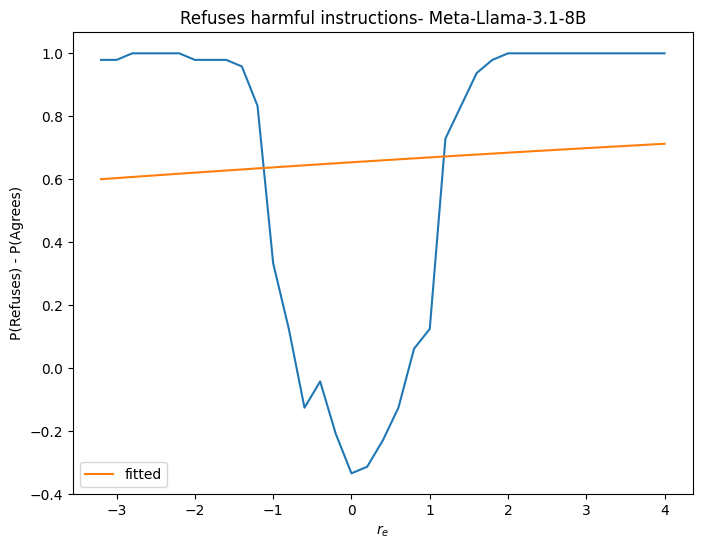

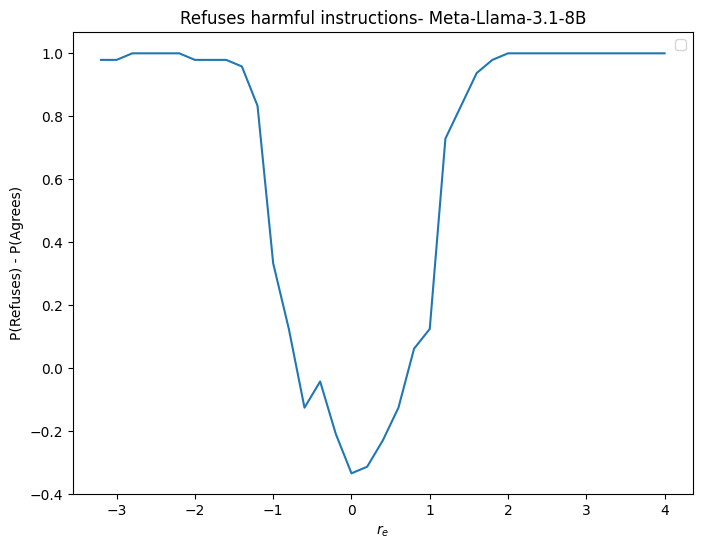

In [18]:

import numpy as np
from scipy.optimize import curve_fit
from lmfit import Model

# Define the quadratic function
def theory_1_quadratic_function(x, a, b0):
    return np.array([math.tanh((a * x_elem) + b0) for x_elem in x])

model = Model(theory_1_quadratic_function)

# Define your (x, y) coordinates
x_data = [round(i,2) for i in np.arange(-3.2, 4.1, 0.2)]
x_full = [round(i,2) for i in np.arange(-5, 5.1, 0.2)]
x_data_idx = [i for i, v in enumerate(x_full) if v in x_data]

b0_idx = [i for i, v in enumerate(x_data) if v == 0][0]

for behavior_type in behavior_types:
  for model_name in model_names:
    y_data_fit = [round(v,2) for i, v in enumerate(list(behavior_mean[model_name][behavior_type].values())) if i in x_data_idx]
    y_data_fit = np.array(y_data_fit)
    # if y_data_fit[0] > 0:
    #   y_data_fit = [y_elem * (-1) for y_elem in y_data_fit]

    # set the plot title
    title_prefix = 'Agrees' if ('chat' in model_name or 'Instruct' in model_name) else 'Refuses'
    title_suffix = 'harmful instructions' if 'harmful' in behavior_type else 'racist statements'
    short_model_name = model_name.split("_")[1]
    title = title_prefix + ' ' + title_suffix + f'- {short_model_name}'

    # set the y_label title
    y_label = ''
    if ('bias' in behavior_type):
      y_label = 'P("Yes") - P("No")' if ('chat' in model_name or 'Instruct' in model_name) else 'P("No") - P("Yes")'
    else:
      y_label = 'P(Agrees) - P(Refuses)' if ('chat' in model_name or 'Instruct' in model_name) else 'P(Refuses) - P(Agrees)'

    if behavior_type == 'behavior_harmful':
      task = 'harmfulness'
    else:
      task = 'fairness'

    # Set initial parameter values and bounds (if needed)
    params = model.make_params(a=2, b0=-2)
    # Perform the fit
    result = model.fit(y_data_fit, x=x_data, params=params)

    y_fit = [theory_1_quadratic_function([x], result.params['a'].value, result.params['b0'].value) for x in x_data]

    y = [v for i,v in enumerate(list(behavior_mean[model_name][behavior_type].values())) if i in x_data_idx]
    y_err = [v for i,v in enumerate(list(behavior_std[model_name][behavior_type].values())) if i in x_data_idx]
    # if y[0] > 0:
    #   y = [y_elem * (-1) for y_elem in y]
    #   y_err = [y_elem * (-1) for y_elem in y_err]
      
    # for i, (k, v) in enumerate(list(behavior_mean[model_name][behavior_type].items())):
    #   if (float(k) < -0.2) and i in x_data_idx:
    #     idx = i-x_data_idx[0]
    #     y[idx] = -1

    # params: x, y, y_err, y_fit, task, title, y_label, model_name
    plot_figure_behavior_multi(x=x_data, y=y, y_err=y_err, y_fit=y_fit, task=task, title=title, y_label=y_label, model_name=model_name, fit_label='_fitted')
    plot_figure_behavior_multi(x=x_data, y=y, y_err=y_err, y_fit=y_fit, task=task, title=title, y_label=y_label, model_name=model_name, fit_label='')

In [19]:
import shutil
from google.colab import files

# Assuming 'temp_folder' is the folder you want to download
folder_name = '/content/plots_behavior_all'

# Create a ZIP file containing the folder
shutil.make_archive(folder_name, 'zip', folder_name)

# Download the ZIP file to your local machine
files.download(folder_name + '.zip')

ModuleNotFoundError: No module named 'google.colab'